In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

In [51]:
df = pd.read_csv('Dataset/cancer.csv')
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    309 non-null    int64
 1   SMOKING                309 non-null    int64
 2   YELLOW_FINGERS         309 non-null    int64
 3   ANXIETY                309 non-null    int64
 4   PEER_PRESSURE          309 non-null    int64
 5   CHRONIC DISEASE        309 non-null    int64
 6   FATIGUE                309 non-null    int64
 7   ALLERGY                309 non-null    int64
 8   WHEEZING               309 non-null    int64
 9   ALCOHOL CONSUMING      309 non-null    int64
 10  COUGHING               309 non-null    int64
 11  SHORTNESS OF BREATH    309 non-null    int64
 12  SWALLOWING DIFFICULTY  309 non-null    int64
 13  CHEST PAIN             309 non-null    int64
 14  LUNG_CANCER            309 non-null    int64
dtypes: int64(15)
memory usage: 36.3 KB


In [53]:
# Check missing data
df.isnull().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>,
        <Axes: title={'center': 'ANXIETY'}>],
       [<Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE '}>,
        <Axes: title={'center': 'ALLERGY '}>],
       [<Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>,
        <Axes: title={'center': 'SHORTNESS OF BREATH'}>],
       [<Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>,
        <Axes: title={'center': 'LUNG_CANCER'}>, <Axes: >]], dtype=object)

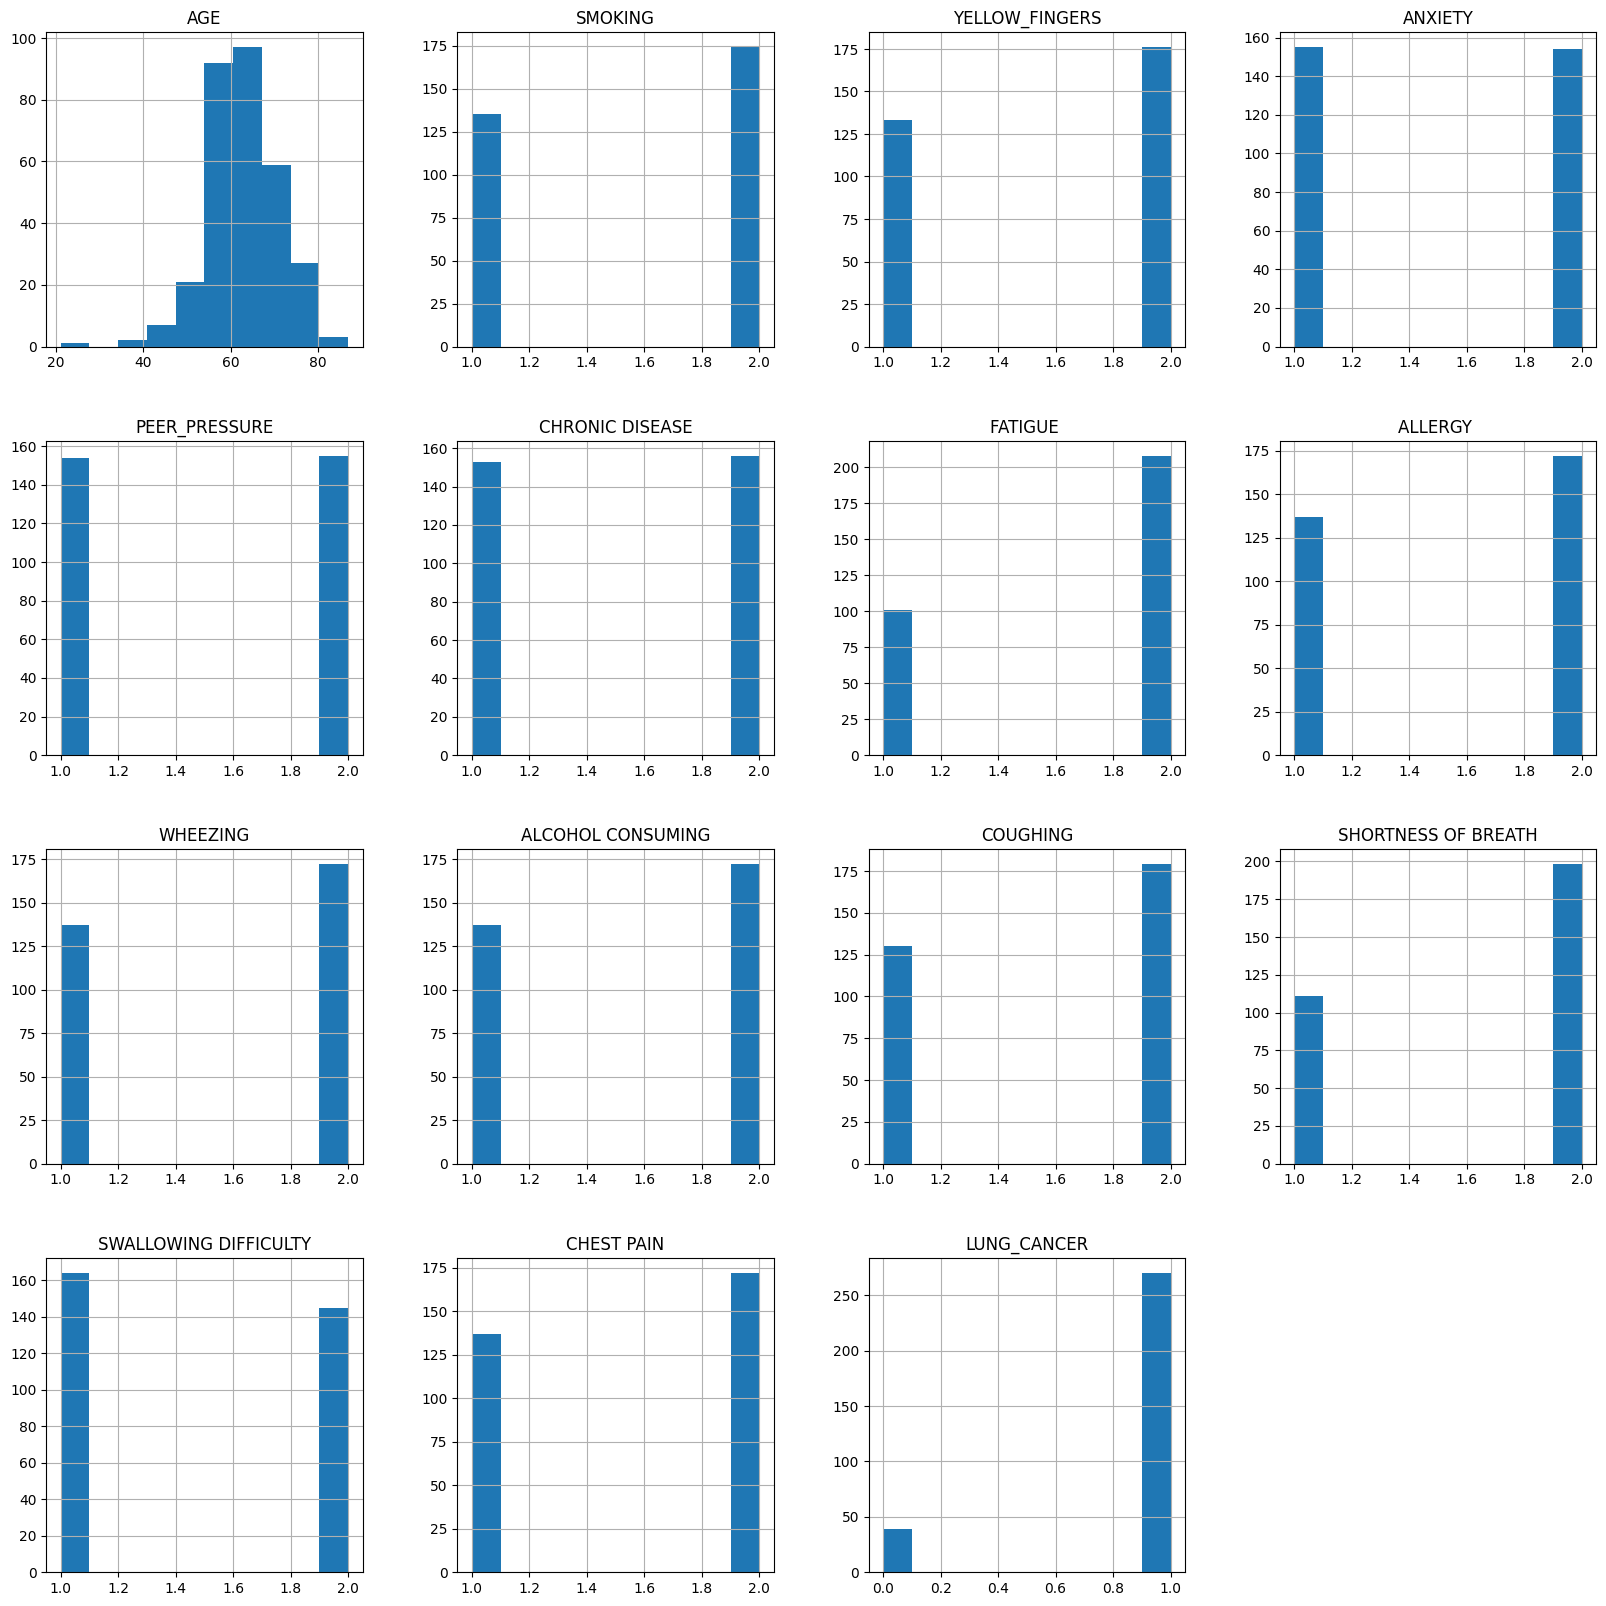

In [54]:
df.hist(figsize=(20, 20))

<Axes: >

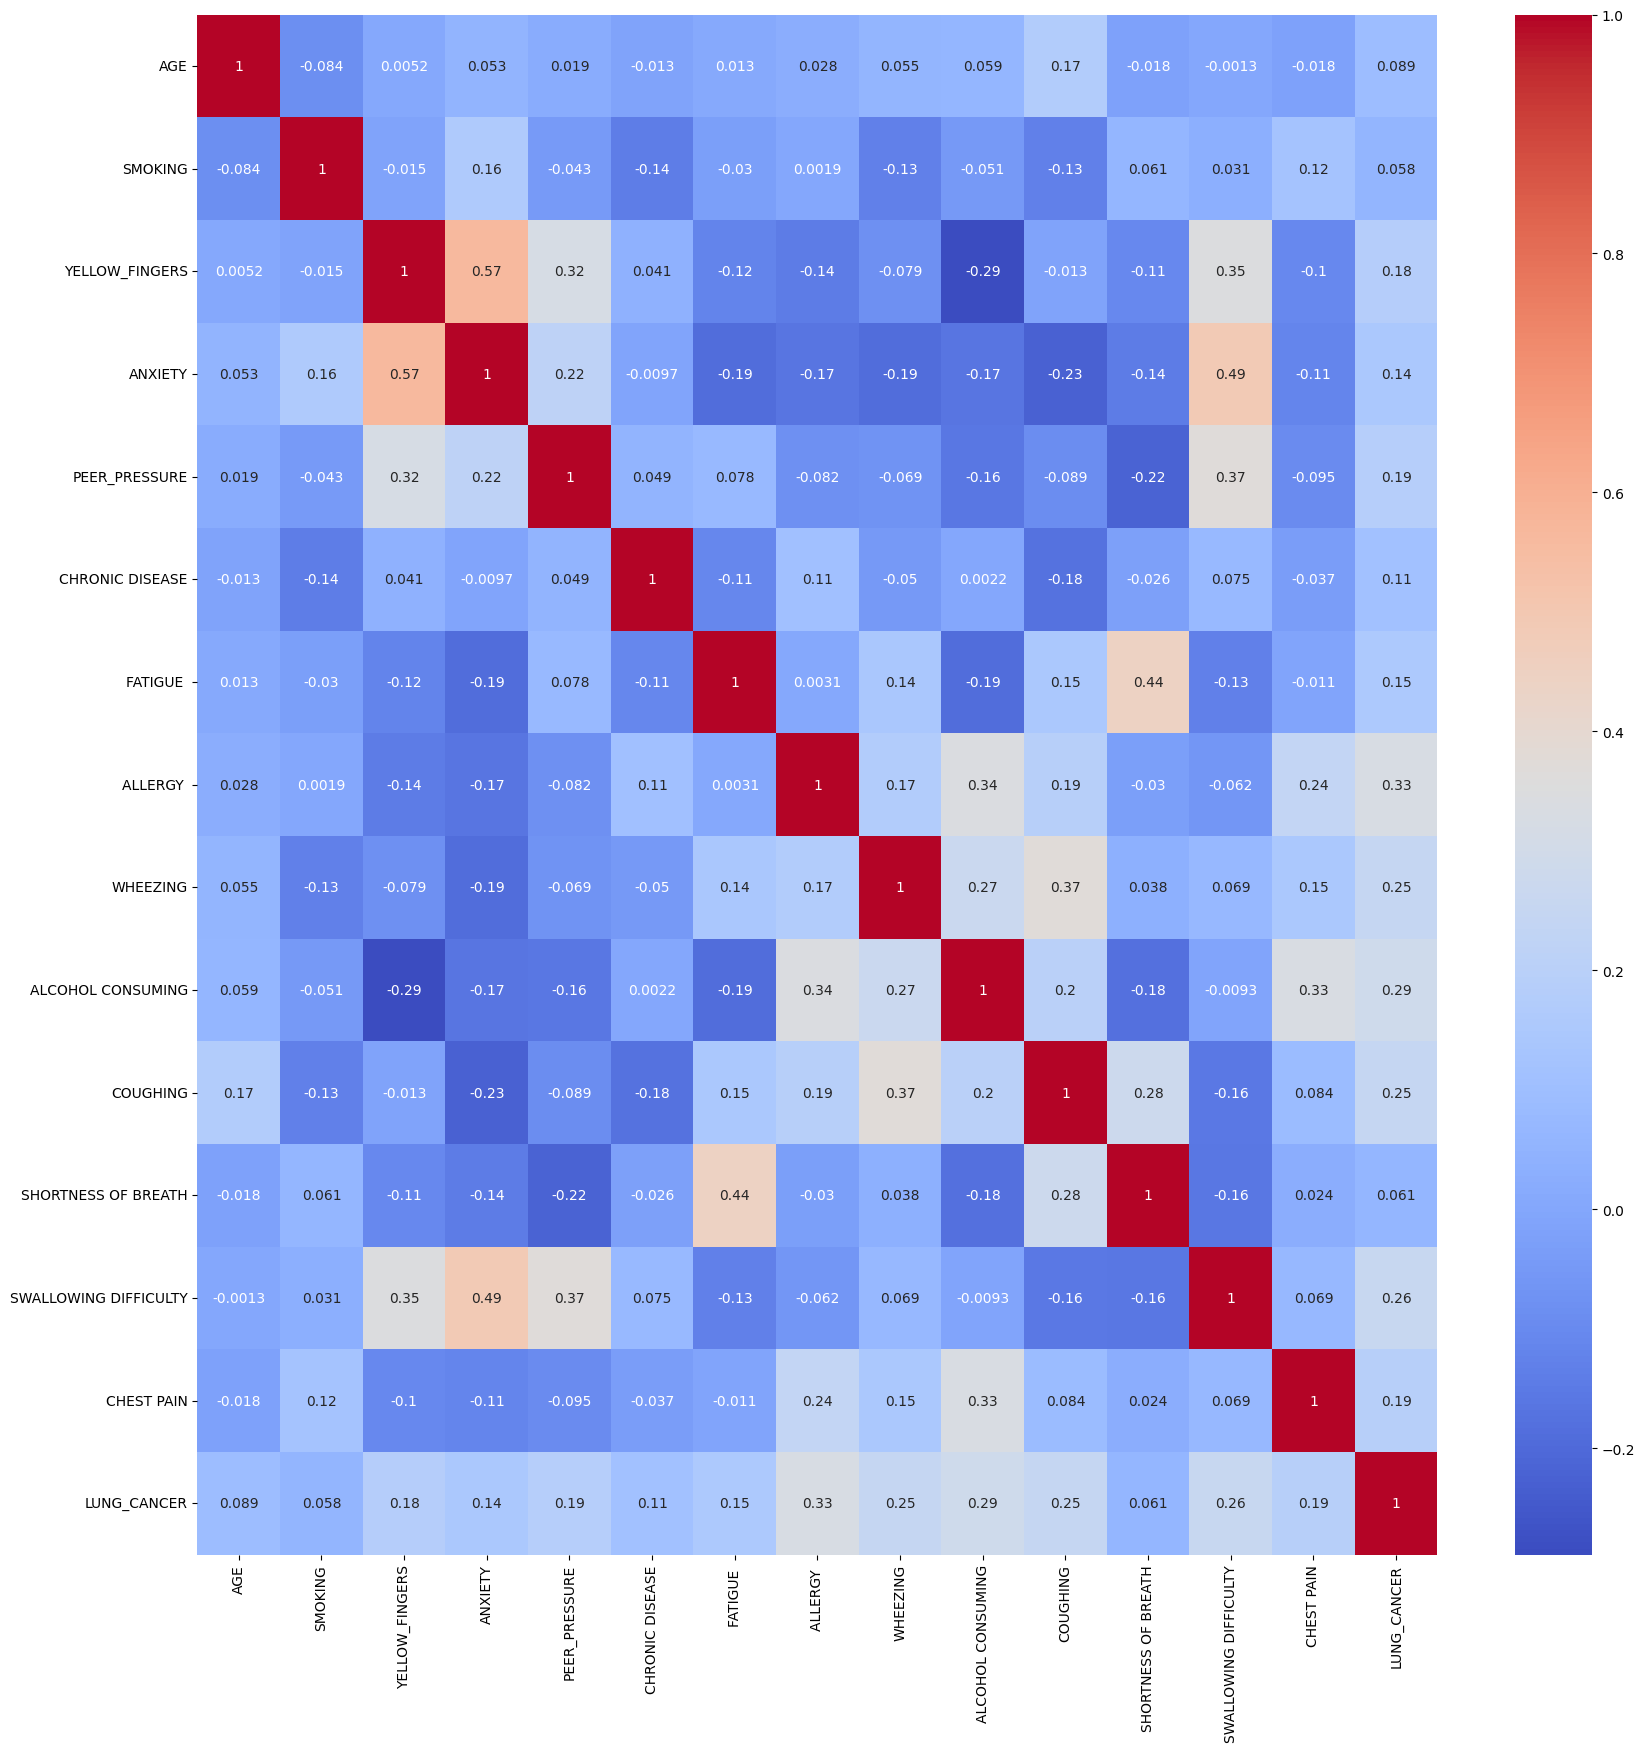

In [55]:
# Co relation matrix
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
 

In [56]:
# Check duplicate data
df.duplicated().sum()

35

In [57]:
# number of feature 
len(df.columns)

15

In [59]:
# Drop unnecessary 
# df.drop(['GENDER'], axis=1, inplace=True)
# df.head()

In [ ]:
# onehot encoding on LUNG_CANCER
df = pd.get_dummies(df, columns=['LUNG_CANCER'])
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_0,LUNG_CANCER_1
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,False,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,False,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,True,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,True,False
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,True,False


In [ ]:
# Drop LUNG_CANCER_0
df.drop(['LUNG_CANCER_0'], axis=1, inplace=True)
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_1
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,False
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,False


In [ ]:
#RENAME LUNG_CANCER_YES to LUNG_CANCER
df.rename(columns={'LUNG_CANCER_1': 'LUNG_CANCER'}, inplace=True)
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,False
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,False


In [ ]:
#Saved the proccessed data
df.to_csv('Dataset/LungCancer.csv', index=False)

In [ ]:
# Load proccesd dataset
df = pd.read_csv('Dataset/LungCancer.csv')

In [ ]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    309 non-null    int64
 1   SMOKING                309 non-null    int64
 2   YELLOW_FINGERS         309 non-null    int64
 3   ANXIETY                309 non-null    int64
 4   PEER_PRESSURE          309 non-null    int64
 5   CHRONIC DISEASE        309 non-null    int64
 6   FATIGUE                309 non-null    int64
 7   ALLERGY                309 non-null    int64
 8   WHEEZING               309 non-null    int64
 9   ALCOHOL CONSUMING      309 non-null    int64
 10  COUGHING               309 non-null    int64
 11  SHORTNESS OF BREATH    309 non-null    int64
 12  SWALLOWING DIFFICULTY  309 non-null    int64
 13  CHEST PAIN             309 non-null    int64
 14  LUNG_CANCER            309 non-null    bool 
dtypes: bool(1), int64(14)
memory usage: 34.2

In [ ]:
# Number of features 
len(df.columns)

15

| Algorithm | Accuracy |
|-----------|----------|
| QDA |0.91 |
| KNN | 0.95|
| SVM | 0.96 |
| Decision tree| 0.95 |
|LDA|0.96|
|Naive Bayes algorithm|0.95|
|K-means|0.46|
|Random forest algorithm|0.96|
|AdaBoost|0.98|
|Neural-Network|0.95|
|XGBoost|0.98|
|Gradient Boosting|0.96|

In [ ]:
# Split data
X = df.drop(['LUNG_CANCER'], axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [ ]:
# K-floding svm knn rf 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
  

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('AdaBoost accuracy: ', accuracy_score(y_test, y_pred))



AdaBoost accuracy:  0.9838709677419355


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('KNN accuracy: ', accuracy_score(y_test, y_pred))
 

KNN accuracy:  0.9516129032258065


In [ ]:
# Random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random forest accuracy: ', accuracy_score(y_test, y_pred))

Random forest accuracy:  0.967741935483871


In [ ]:
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('SVM accuracy: ', accuracy_score(y_test, y_pred))

SVM accuracy:  0.967741935483871


In [ ]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Decision tree accuracy: ', accuracy_score(y_test, y_pred))

Decision tree accuracy:  0.967741935483871


In [ ]:
#Quadratic discriminant analysis (QDA)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
print('QDA accuracy: ', accuracy_score(y_test, y_pred))

QDA accuracy:  0.9193548387096774


In [ ]:
# Linear discriminant analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print('LDA accuracy: ', accuracy_score(y_test, y_pred))

LDA accuracy:  0.967741935483871


In [ ]:
# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('Naive Bayes accuracy: ', accuracy_score(y_test, y_pred))

Naive Bayes accuracy:  0.9516129032258065


In [ ]:
#adabost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('AdaBoost accuracy: ', accuracy_score(y_test, y_pred))

AdaBoost accuracy:  0.9838709677419355


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=ada, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))


Accuracy: 89.05 %


In [ ]:
# # # RMSE , MAE , RECALL ,Precisio, F1, R2 in ada
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, recall_score, precision_score, f1_score
import numpy as np

# Assuming you have your y_test and y_pred variables ready

# Convert boolean arrays to integer arrays
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


RMSE: 0.1270001270001905
MAE: 0.016129032258064516
R2: 0.4833333333333333
Recall: 1.0
Precision: 0.9836065573770492
F1: 0.9917355371900827


In [ ]:
# Save the ADAboost Model
import pickle
filename = 'Lung_ada_model.sav'
pickle.dump(ada, open(filename, 'wb'))
 

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Gradient Boosting accuracy: ', accuracy_score(y_test, y_pred))
 

Gradient Boosting accuracy:  0.967741935483871


In [ ]:
# Neural Net
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print('Neural Net accuracy: ', accuracy_score(y_test, y_pred))

Neural Net accuracy:  0.967741935483871


c:\Users\Low Charge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

XGBoost accuracy:  0.9838709677419355


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))


Accuracy: 85.85 %


In [ ]:
# K-fold cross validation 
kfold = KFold(n_splits=10, random_state=42,  shuffle=True)
result = cross_val_score(knn, X, y, cv=kfold)
print('KNN k-fold cross validation: ', result.mean())
result = cross_val_score(rf, X, y, cv=kfold)
 

KNN k-fold cross validation:  0.8772043010752688


In [ ]:
#K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train, y_train)
y_pred = kmeans.predict(X_test)
print('K-means accuracy: ', accuracy_score(y_test, y_pred))


K-means accuracy:  0.5645161290322581


c:\Users\Low Charge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling1D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.layers import PReLU
from keras.layers import ELU
from keras.layers import ThresholdedReLU
from keras.layers import Softmax
from keras.layers import ReLU
from keras.layers import Add
from keras.layers import Multiply
from keras.layers import Average
from keras.layers import Maximum
from keras.layers import Minimum
from keras.layers import Concatenate
from keras.layers import Dot
from keras.layers import GaussianNoise
from keras.layers import GaussianDropout
from keras.layers import AlphaDropout
from keras.layers import ActivityRegularization
from keras.layers import Masking


In [64]:
# Traing for parkinsons
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.array(y_train)
y_test = np.array(y_test)


In [65]:
# Train
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32,
          validation_data=(X_test, y_test))


Epoch 1/10
8/8 [==============================] - 8s 249ms/step - loss: 0.4993 - accuracy: 0.7854 - val_loss: 0.2238 - val_accuracy: 0.9677
Epoch 2/10
8/8 [==============================] - 0s 52ms/step - loss: 0.4190 - accuracy: 0.8502 - val_loss: 0.2462 - val_accuracy: 0.9677
Epoch 3/10
8/8 [==============================] - 0s 51ms/step - loss: 0.4034 - accuracy: 0.8502 - val_loss: 0.1673 - val_accuracy: 0.9677
Epoch 4/10
8/8 [==============================] - 0s 62ms/step - loss: 0.4330 - accuracy: 0.8502 - val_loss: 0.3478 - val_accuracy: 0.9677
Epoch 5/10
8/8 [==============================] - 0s 51ms/step - loss: 0.4300 - accuracy: 0.8502 - val_loss: 0.1525 - val_accuracy: 0.9677
Epoch 6/10
8/8 [==============================] - 0s 53ms/step - loss: 0.3914 - accuracy: 0.8502 - val_loss: 0.2565 - val_accuracy: 0.9677
Epoch 7/10
8/8 [==============================] - 1s 66ms/step - loss: 0.3895 - accuracy: 0.8502 - val_loss: 0.1599 - val_accuracy: 0.9677
Epoch 8/10
8/8 [==========

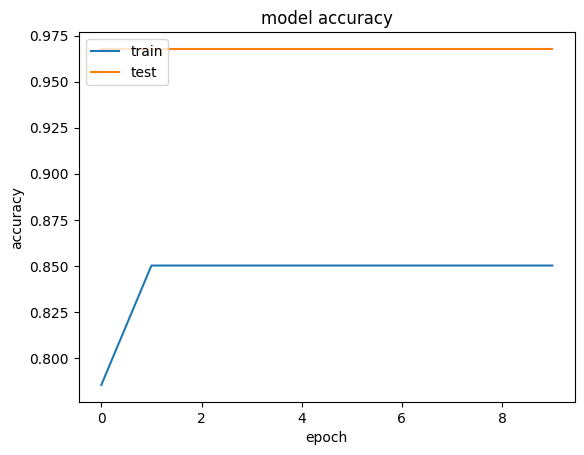

In [66]:
# Accuracy graph
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
